In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]


[]

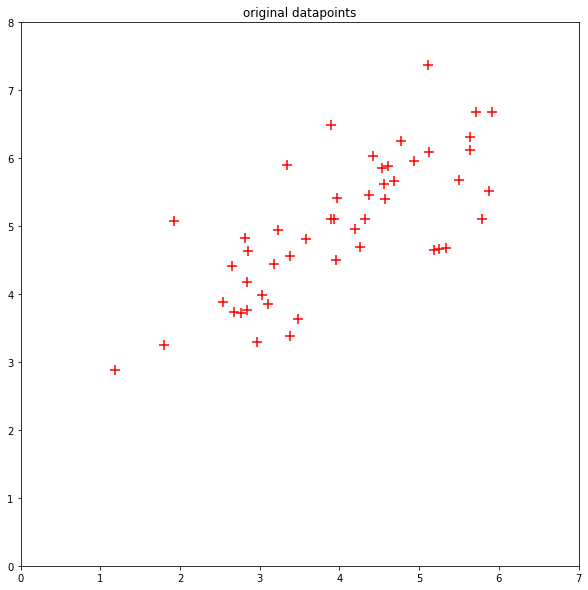

In [15]:
plt.figure(1,figsize=(10,10))
plt.scatter(x,y,c="red",marker="+",s=100)
plt.xlim((0,7))
plt.ylim((0,8))
plt.title("original datapoints")
plt.plot()

# outputs

## 1. Plot the original data points [1pt]

## 2. Plot the normalized data points [1pt]

## 3. Plot the principal axes [2pt]

## 4. Plot the first principal axis [3pt]

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

## 7. Plot the second principal axis [3pt]

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]